In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import random as rn
from sklearn import preprocessing
train=pd.read_csv("/home/chiku/lon/train.csv")
test=pd.read_csv("/home/chiku/lon/testp.csv")
tr=pd.DataFrame(preprocessing.normalize(train.iloc[:,0:5]))
x_train=tr.iloc[:,0:4]
y_train=tr.iloc[:,-1]
one1=np.ones([x_train.shape[0],1])
x_train.insert(loc=0,column='x0',value=one1)
te=pd.DataFrame(preprocessing.normalize(test.iloc[:,0:5]))
x_test=te.iloc[:,0:4]
y_test=te.iloc[:,-1]
one2=np.ones([x_test.shape[0],1])
x_test.insert(loc=0,column='x0',value=one2)

In [2]:
def hyp(theta,x):
    p=x.dot(theta)
    return p

In [3]:
def cost(theta,x,y,lamb,alpha):
    m=len(x)
    k=lamb*(0.5*(1-alpha)*sum(np.square(theta))+alpha*sum(theta))
    ct=((1/2*m)*(np.sum((x.dot(theta)-y)**2)))+k
    return ct

In [4]:
def elastic(x,y,alpha,iternum,lamb):
    theta=np.zeros(x.shape[1])
    m=x.shape[0]
    cos=[]
    tmp=theta
    for i in range(iternum):
        y_pre=hyp(theta,x)
        grad=(np.dot(x.T,(y_pre-y))*(1/m))+lamb*((1-alpha)*sum(theta)+alpha)
        tmp =theta-alpha*grad
        theta=tmp
        cos.append(cost(theta,x,y,lamb,alpha))
    return theta,cos

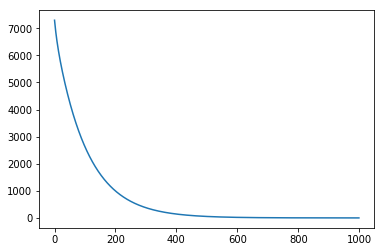

In [25]:
#elastic(x,y,alpha,iternum,lamb)
A,B=elastic(x_train,y_train,0.005,1000,5)
plt.plot(B)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test,hyp(A,x_test)))
rms

0.011644174837432552